# Graphs

## Requirements

In [357]:
!pip install seaborn pandas pandas-profiling[notebook]

In [359]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport

## Data

In [361]:
df = pd.read_csv("./dataset/out/summary.csv")
df.describe()

,features,nametag-exact,nametag-inside,nametag-partial,nametag-lines,nltk-exact,nltk-inside,nltk-partial,nltk-lines,spacy-exact,spacy-inside,spacy-partial,spacy-lines
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,77.585859,37.181818,11.464646,1.050505,102.525253,29.656566,1.888889,0.747475,44.363636,27.343434,4.959596,1.101010,92.010101
std,135.363005,71.824810,52.559454,1.716509,209.003044,56.807078,3.401347,1.493820,88.499216,40.385177,10.611814,1.656742,118.893409
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,8.000000,0.000000,0.000000,14.000000,5.000000,0.000000,0.000000,8.000000,4.000000,0.000000,0.000000,14.500000
50%,30.000000,14.000000,1.000000,0.000000,29.000000,11.000000,1.000000,0.000000,19.000000,10.000000,2.000000,1.000000,36.000000
75%,84.000000,36.000000,3.000000,1.000000,111.000000,34.500000,2.000000,1.000000,53.000000,32.000000,5.000000,1.000000,134.000000
max,994.000000,592.000000,417.000000,10.000000,1576.000000,481.000000,19.000000,9.000000,772.000000,220.000000,79.000000,8.000000,570.000000


In [363]:
min_feat = 20
df[df["features"] > min_feat].describe()

,features,nametag-exact,nametag-inside,nametag-partial,nametag-lines,nltk-exact,nltk-inside,nltk-partial,nltk-lines,spacy-exact,spacy-inside,spacy-partial,spacy-lines
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,114.562500,53.812500,17.359375,1.468750,152.515625,43.40625,2.625000,1.109375,65.187500,40.468750,6.93750,1.609375,136.093750
std,156.718115,84.989238,64.783490,1.975796,246.473090,66.86725,4.017817,1.737698,104.544799,45.142796,12.74895,1.848356,127.960649
min,21.000000,6.000000,0.000000,0.000000,12.000000,3.00000,0.000000,0.000000,6.000000,2.000000,0.00000,0.000000,11.000000
25%,31.750000,15.000000,1.000000,0.000000,29.750000,12.00000,0.000000,0.000000,19.000000,10.750000,1.00000,0.000000,37.750000
50%,48.500000,26.000000,2.500000,1.000000,66.500000,23.50000,1.500000,0.500000,34.000000,21.000000,3.00000,1.000000,92.500000
75%,133.250000,62.250000,5.000000,2.000000,164.000000,52.75000,3.000000,1.000000,69.000000,55.500000,6.25000,2.000000,199.500000
max,994.000000,592.000000,417.000000,10.000000,1576.000000,481.00000,19.000000,9.000000,772.000000,220.000000,79.00000,8.000000,570.000000


## Profile

In [365]:
profile = ProfileReport(df[df["features"] > min_feat])
#profile.to_notebook_iframe()

## Recall
$$ \text{recall} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{\text{TP}}{\text{Total actual positive}} $$


In [367]:
# Any match
df['nametag-recall'] = (df['nametag-exact'] + df['nametag-inside'] + df['nametag-partial']) / df['features']
df['nltk-recall'] = (df['nltk-exact'] + df['nltk-inside'] + df['nltk-partial']) / df['features']
df['spacy-recall'] = (df['spacy-exact'] + df['spacy-inside'] + df['spacy-partial']) / df['features']
recall_df = df[['nametag-recall', 'nltk-recall', 'spacy-recall']]
# Exact match
df['nametag-recall-exact'] = df['nametag-exact'] / df['features']
df['nltk-recall-exact'] = df['nltk-exact'] / df['features']
df['spacy-recall-exact'] = df['spacy-exact'] / df['features']
recall_exact_df = df[['nametag-recall-exact', 'nltk-recall-exact', 'spacy-recall-exact']]

In [369]:
recall_df.describe()

,nametag-recall,nltk-recall,spacy-recall
count,96.000000,96.000000,96.000000
mean,0.659056,0.508774,0.510146
std,0.187636,0.213912,0.197527
min,0.263158,0.026895,0.000000
25%,0.524124,0.376179,0.376521
50%,0.646110,0.529683,0.520916
75%,0.808187,0.670455,0.641329
max,1.000000,1.000000,1.000000


In [371]:
recall_df[df["features"] > min_feat].describe()

,nametag-recall,nltk-recall,spacy-recall
count,64.000000,64.000000,64.000000
mean,0.583838,0.499499,0.518118
std,0.153029,0.210515,0.178177
min,0.267925,0.026895,0.103448
25%,0.484326,0.376179,0.413248
50%,0.583333,0.515319,0.520916
75%,0.659796,0.641066,0.637317
max,0.975550,0.935484,0.811321


Text(0.5, 1.0, 'Recall (exact match)')

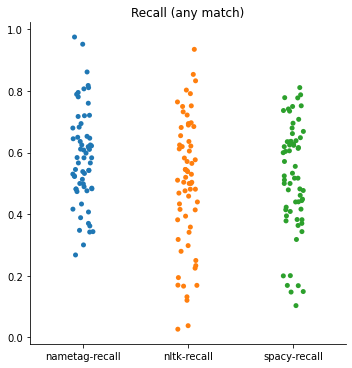

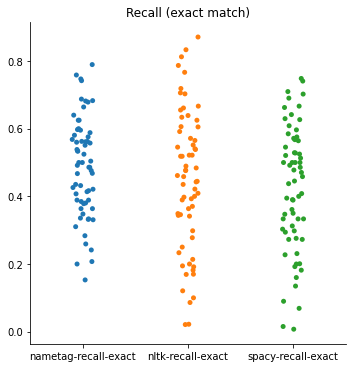

In [373]:
sns.catplot(data=recall_df[df["features"] > min_feat])
plt.title('Recall (any match)')
sns.catplot(data=recall_exact_df[df["features"] > min_feat])
plt.title('Recall (exact match)')

array([[<AxesSubplot:title={'center':'nametag-recall'}>,
        <AxesSubplot:title={'center':'nltk-recall'}>,
        <AxesSubplot:title={'center':'spacy-recall'}>]], dtype=object)

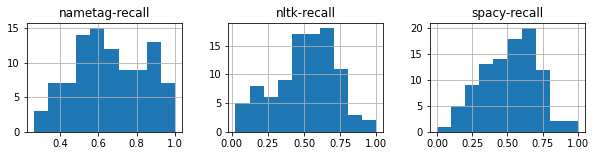

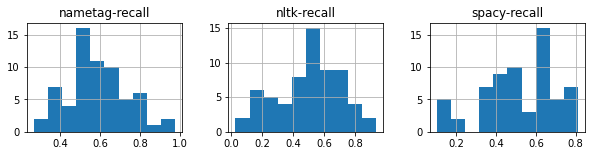

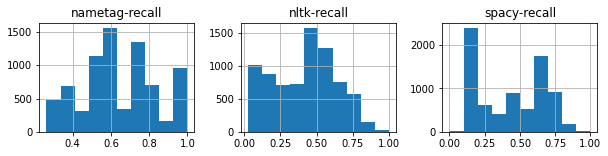

In [375]:
recall_df.hist(layout=(1,3), figsize=(10,2))
recall_df[df["features"] > min_feat].hist(layout=(1,3), figsize=(10,2))
recall_df[df["features"]>0].hist(layout=(1,3), figsize=(10,2), weights=df[df["features"]>0]["features"])

<AxesSubplot:title={'center':'Recall (weighted)'}>

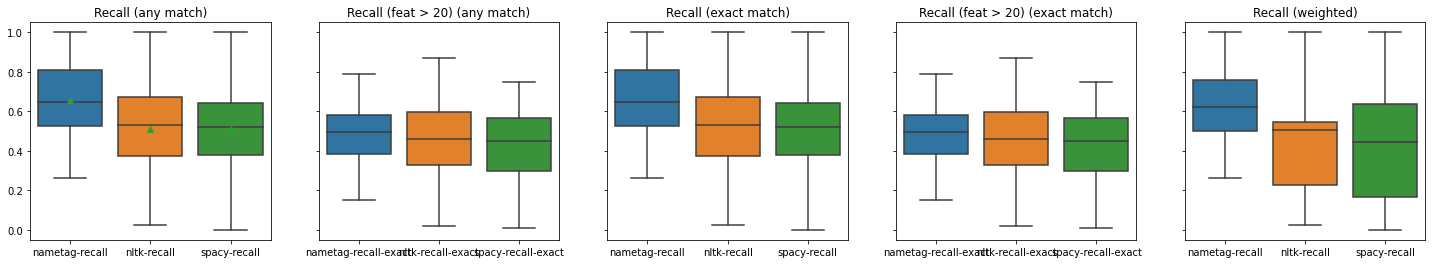

In [377]:
fig, axs = plt.subplots(ncols=5, figsize=(25,4), sharey=True)
axs[0].set_title('Recall (any match)')
sns.boxplot(data=recall_df, ax=axs[0], showmeans=True)
axs[1].set_title(f"Recall (feat > {min_feat}) (any match)")
sns.boxplot(data=recall_exact_df[df["features"] > min_feat], ax=axs[1])
axs[2].set_title('Recall (exact match)')
sns.boxplot(data=recall_df, ax=axs[2])
axs[3].set_title(f"Recall (feat > {min_feat}) (exact match)")
sns.boxplot(data=recall_exact_df[df["features"] > min_feat], ax=axs[3])

def reindex_df(df, weights):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(weights))
    df.reset_index(drop=True, inplace=True)
    return(df)
axs[4].set_title(f"Recall (weighted)")
sns.boxplot(data=reindex_df(recall_df, df["features"]), ax=axs[4])

### Full data

<AxesSubplot:ylabel='Count'>

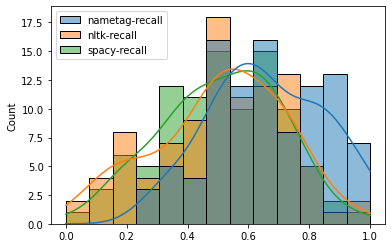

In [379]:
sns.histplot(kde=True, data=recall_df)

### Filtered data

<AxesSubplot:ylabel='Count'>

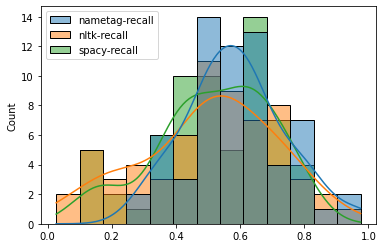

In [381]:
sns.histplot(kde=True, data=recall_df[df["features"] > min_feat])

## Precision

$$ \text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{\text{TP}}{\text{Total predicted posititive}} $$


In [383]:
# Any match
df['nametag-prec'] = (df['nametag-exact'] + df['nametag-inside'] + df['nametag-partial']) / df['nametag-lines']
df['nltk-prec'] = (df['nltk-exact'] + df['nltk-inside'] + df['nltk-partial']) / df['nltk-lines']
df['spacy-prec'] = (df['spacy-exact'] + df['spacy-inside'] + df['spacy-partial']) / df['spacy-lines']
precision_df = df[['nametag-prec', 'nltk-prec', 'spacy-prec']]

In [384]:
precision_df.describe()

,nametag-prec,nltk-prec,spacy-prec
count,96.000000,96.000000,96.000000
mean,0.604156,0.775499,0.409751
std,0.219639,0.176129,0.179309
min,0.120370,0.250000,0.000000
25%,0.451566,0.680531,0.293137
50%,0.600000,0.785714,0.390108
75%,0.769231,0.904167,0.500000
max,1.200000,1.125000,1.200000


<AxesSubplot:title={'center':'Precision (weighted)'}>

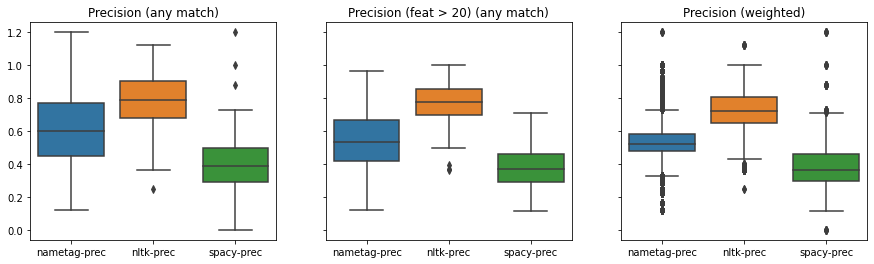

In [385]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=True)
axs[0].set_title('Precision (any match)')
sns.boxplot(data=precision_df, ax=axs[0])
axs[1].set_title(f"Precision (feat > {min_feat}) (any match)")
sns.boxplot(data=precision_df[df["features"] > min_feat], ax=axs[1])

def reindex_df(df, weights):
    """expand the dataframe to prepare for resampling
    result is 1 row per count per sample"""
    df = df.reindex(df.index.repeat(weights))
    df.reset_index(drop=True, inplace=True)
    return(df)
axs[2].set_title(f"Precision (weighted)")
sns.boxplot(data=reindex_df(precision_df, df["features"]), ax=axs[2])

## Summary


In [386]:
summary = pd.read_csv("./dataset/out/summary.csv").sum()
summary = pd.DataFrame(columns=("ner", "exact", "inside", "partial", "predicted positive", "acctual positive"), data=
[["nametag", *summary[["nametag-exact", "nametag-inside", "nametag-partial", "nametag-lines", "features"]].values.tolist()],
["nltk", *summary[["nltk-exact", "nltk-inside", "nltk-partial", "nltk-lines", "features"]].values.tolist()],
["spacy", *summary[["spacy-exact", "spacy-inside", "spacy-partial", "spacy-lines", "features"]].values.tolist()]])
summary["recall"] = (summary["exact"] + summary["inside"] + summary["partial"] )/ summary["acctual positive"]
summary["precission"] = (summary["exact"] + summary["inside"] + summary["partial"] )/ summary["predicted positive"]
summary["f1"] = 2 * (summary["precission"] * summary["recall"]) / (summary["precission"] + summary["recall"])


<AxesSubplot:title={'center':'f1'}, xlabel='ner', ylabel='f1'>

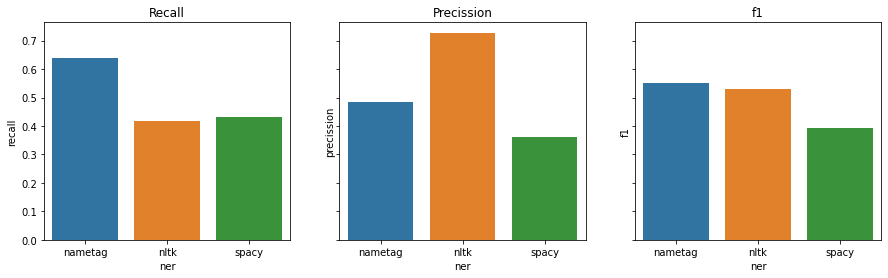

In [387]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=True)
axs[0].set_title("Recall")
sns.barplot(x="ner", y="recall", data=summary, ax=axs[0])
axs[1].set_title("Precission")
sns.barplot(x="ner", y="precission", data=summary, ax=axs[1])
axs[2].set_title("f1")
sns.barplot(x="ner", y="f1", data=summary, ax=axs[2])